In [1]:
#Importamos las librerias necesarias
from ase.data.pubchem import pubchem_atoms_search, pubchem_atoms_conformer_search
from ase.build import molecule
import pandas as pd

In [2]:
#Importamos la base de datos
data = pd.read_csv("melting_point_info.csv") 
cids = list(data['cid'])   
smiles = list(data['smiles'])
mp= list(data['melting_point'])

In [3]:
data

,Unnamed: 0,cid,melting_point,names,smiles
0,0,2244,139.00,Acetylsalicylic acid,CC(=O)OC1=CC=CC=C1C(=O)O
1,1,1051,528.15,Pyridoxal phosphate,CC1=NC=C(C(=C1O)C=O)COP(=O)(O)O
2,2,6274,560.15,Histidine,C1=C(NC=N1)C[C@@H](C(=O)O)N
3,3,1060,286.95,Pyruvic acid,CC(=O)C(=O)O
4,4,6140,556.15,Phenylalanine,C1=CC=C(C=C1)C[C@@H](C(=O)O)N
...,...,...,...,...,...
820,820,16630,410.15,Aminorex,C1C(OC(=N1)N)C2=CC=CC=C2
821,821,13765,173.50,Ethylestrenol,CC[C@@]1(CC[C@@H]2[C@@]1(CC[C@H]3[C@H]2CCC4=CC...
822,822,26721,215.50,Etorphine,CCCC(C)(C1C[C@@]23C=CC1(C4[C@@]25CCN([C@@H]3CC...
823,823,20055236,462.15,Oxabolone,C[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@@H]2O)CCC4=C(...


(0.0, 170.0)

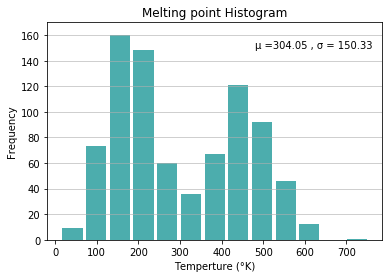

In [4]:

import matplotlib.pyplot as plt
import statistics as stats

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(mp, bins='auto', color='darkcyan',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Temperture (°K)')
plt.ylabel('Frequency')
plt.title('Melting point Histogram')

mu = stats.mean(mp)
sigma = stats.pstdev(mp)
mu = str(round(mu, 2))
sigma = str(round(sigma, 2))


plt.text(480, 150, '\u03BC ='+ mu +' , ' +'\u03C3 = ' + sigma)
maxfreq = n.max()

plt.savefig('histograma_completo.png', dpi=500)
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [5]:
print(len(cids), len(smiles), len(mp))

825 825 825


In [6]:
#Guardamos los el no. de átomos de las moléculas que puede encontrar,
#asi como el  cid de las moléculas que no,
atoms = []   #Lista con el no total de átomos por molécula disponible
cids_available = []
smiles_available = []
mp_available = []
errors = []
mp_errors = []
cid_errors = []
smiles_errors = []
for i in range(len(cids)):
    try:
        unknown = pubchem_atoms_search(cid = cids[i])
        n_atoms = len(unknown.get_chemical_symbols())
        atoms.append(n_atoms)
        cids_available.append(cids[i])
        smiles_available.append(smiles[i])
        mp_available.append(mp[i])
        print(i)
    except ValueError:  
        errors.append(i)
        mp_errors.append(mp[i])
        cid_errors.append(cids[i])
        smiles_errors.append(smiles[i])
        print('error in', i)
        continue

/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2244" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


0


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "1051" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


1


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6274" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


2
3


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6140" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


4


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "171548" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


5


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5962" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


6


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6322" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


7


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "54670067" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


8


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "1103" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


9


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5960" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


10


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6262" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


11


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5961" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


12


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6083" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


13


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5280934" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


14


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5951" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


15


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6137" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


16


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6057" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


17


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5280453" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


18


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5281243" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


19


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "67678" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


20


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "1110" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


21


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "493570" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


22


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "1738118" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


23


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "33032" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


24


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "124886" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


25


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "750" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


26


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "1050" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


27


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "586" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


28


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6106" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


29


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6305" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


30


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5862" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


31


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "1130" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


32


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5280793" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


33


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "9750" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


34


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6288" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


35


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "439153" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


36


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5950" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


37


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6287" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


38


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "445354" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


39


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "14985" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


40


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "1054" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


41


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6112" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


42


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6306" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


43


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5280795" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


44
45


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5957" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


46


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "145742" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


47
48


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6267" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


49


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "54687" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


50


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3404" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


51


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "60846" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


52


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5362129" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


53


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "71398" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


54


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "82153" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


55


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2284" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


56


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3007" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


57


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "89594" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


58


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3958" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


59


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "34359" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


60


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4771" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


61


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "52195" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


62


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "33741" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


63


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2369" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


64


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3365" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


65


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5591" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


66
67


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "135398744" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


68
69


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5770" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


70


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4195" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


71


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4679" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


72


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "41781" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


73


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2771" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


74


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2368" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


75


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "152946" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


76


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5749" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


77


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "64143" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


78


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3476" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


79


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5362440" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


80


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "38521" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


81


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "53232" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


82


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5486971" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


83


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5391" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


84


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4121" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


85


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4649" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


86


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2479" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


87


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4463" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


88


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2481" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


89


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "20279" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


90


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "56959" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


91


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4075" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


92


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "1201549" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


93


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6540428" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


94


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "54746" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


95


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5905" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


96
97


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "441383" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


98


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "1775" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


99


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "247839" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


100


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "54671203" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


101


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3054" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


102


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2812" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


103
104
105
106


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2578" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


107


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5344" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


108


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4171" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


109


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "54676038" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


110


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5095" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


111


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "11289" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


112


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3784" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


113


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2140" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


114


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5284627" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


115


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "158781" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


116


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2179" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


117
118


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5920" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


119


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3114" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


120


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3676" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


121


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "26987" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


122


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "54841" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


123


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2708" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


124


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "667484" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


125


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "135400182" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


126
127
128


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2474" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


129


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "135398748" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


130
131


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "8275" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


132


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2732" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


133


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3295" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


134


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4737" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


135


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "1983" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


136
137


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2160" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


138


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5790" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


139


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "9878" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


140


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3715" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


141


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "14052" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


142


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4091" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


143


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4095" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


144


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "135398745" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


145


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2249" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


146


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5447130" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


147


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4594" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


148


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "1046" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


149


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2678" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


150


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5405" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


151


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "39186" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


152


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2148" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


153
154


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2789" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


155


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4201" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


156


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "11683" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


157


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "8226" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


158
159


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2145" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


160


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5215" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


161


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "135398737" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


162
163


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "439260" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


164


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "60613" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


165


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4205" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


166


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4064" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


167


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5440" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


168


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "33624" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


169


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5572" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


170


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "9051" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


171


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4178" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


172


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "71384" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


173


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2162" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


174
175
176


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4919" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


177


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6041" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


178


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "31072" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


179


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5355" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


180


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3290" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


181


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4497" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


182


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "21700" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


183


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2576" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


184


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5994" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


185


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "26934" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


186


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "441140" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


187


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "969472" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


188
189


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "16960" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


190
191


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3964" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


192


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "77999" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


193


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "119570" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


194


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "1989" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


195


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6249" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


196


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5193" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


197


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "51634" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


198
199


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4107" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


200


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "154417" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


201


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5732" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


202


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3324" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


203


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5282443" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


204


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "29327" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


205


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "727" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


206


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6256" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


207


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4917" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


208


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2913" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


209


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2315" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


210
211


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5481173" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


212


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5578" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


213


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "60750" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


214


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "9782" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


215


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "452548" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


216


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "41867" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


217


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5959" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


218


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3883" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


219


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3105" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


220


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3168" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


221


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5819" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


222


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4058" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


223


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3957" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


224


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6024" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


225


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4893" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


226


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3696" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


227


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5284513" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


228


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4409" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


229


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4099" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


230


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3229" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


231


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3034034" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


232


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "54677971" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


233


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "16078" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


234


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5281040" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


235


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3386" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


236


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "10770" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


237


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2712" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


238


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2726" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


239


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "37768" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


240


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5035" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


241


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2662" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


242


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2435" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


243


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "51081" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


244


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2123" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


245


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5253" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


246


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2477" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


247


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "441314" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


248


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "35370" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


249
250
251


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3397" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


252


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5509" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


253


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2756" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


254


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3559" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


255


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5359371" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


256


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "20299" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


257


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "41684" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


258


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "8730" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


259


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "564" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


260


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5360696" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


261


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2082" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


262


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5484727" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


263


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6957673" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


264


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "449171" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


265


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4170" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


266


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5510" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


267
268


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2907" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


269


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4060" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


270


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6915944" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


271
272


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2764" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


273


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3005573" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


274


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4543" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


275


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5362124" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


276


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2170" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


277
278


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4991" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


279


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5311067" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


280


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2266" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


281


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5717" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


282


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "657298" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


283
284


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "439693" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


285
286


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "54676228" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


287
288


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3658" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


289


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3156" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


290


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2343" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


291


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "126941" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


292


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2554" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


293


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2724354" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


294


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "27447" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


295


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4946" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


296


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "174174" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


297


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3342" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


298


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2803" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


299


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5328" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


300


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "135398742" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


301


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4020" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


302


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "11333" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


303


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "71616" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


304


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "10917" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


305


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5388962" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


306


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3033637" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


307


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3033" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


308


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "444036" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


309


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3157" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


310


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6215" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


311
312


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3291" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


313


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "16231" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


314


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "54675779" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


315


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3869" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


316


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "7638" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


317


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6279" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


318


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6917698" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


319


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "1548887" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


320


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2910" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


321


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2761171" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


322


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5906" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


323


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6916249" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


324


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2405" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


325


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2165" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


326


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3435" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


327


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "54680690" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


328


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5291" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


329


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "31307" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


330
331


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4474" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


332


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3372" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


333
334
335


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "938" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


336


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3517" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


337


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2088" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


338


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5320" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


339


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5865" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


340


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2796" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


341


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2247" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


342


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "60961" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


343


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "54454" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


344


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4030" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


345


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3180" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


346


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "10100" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


347


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4211" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


348


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "18283" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


349


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "135403648" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


350


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3182" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


351


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "441278" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


352
353


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5533" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


354


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4032" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


355


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "15459" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


356


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5577" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


357


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "16490" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


358


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "9047" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


359


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5816" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


360


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5358" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


361


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5362065" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


362


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2727" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


363


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2733526" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


364


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2345" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


365


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3961" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


366


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5452" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


367


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "34633" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


368


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "54678486" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


369


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4192" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


370


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5281078" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


371


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "19150" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


372


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3393" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


373


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5775" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


374
375


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "30323" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


376


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3440" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


377


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "8223" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


378


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5487" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


379


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6604200" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


380


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4100" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


381


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5360515" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


382


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5625" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


383


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "129211" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


384


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "41693" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


385


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "60825" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


386


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3052" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


387


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3394" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


388


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6196" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


389


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "43815" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


390


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "50294" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


391


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6230" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


392


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "19861" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


393
394


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4914" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


395


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5362119" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


396


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "57469" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


397


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5584" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


398


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4510" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


399


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5430" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


400


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "135398747" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


401


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5073" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


402


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "9568614" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


403


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4034" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


404


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4735" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


405


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "443387" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


406


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5070" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


407


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5754" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


408


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6251" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


409


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "60490" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


410


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4236" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


411


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3000322" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


412


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3308" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


413


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4906" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


414


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3241" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


415


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3763" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


416


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3292" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


417


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5538" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


418


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3598" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


419


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3033818" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


420


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "60606" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


421


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "54675776" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


422


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "60838" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


423
424


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "441335" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


425


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "441350" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


426


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5280980" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


427


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2342" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


428


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "84088" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


429


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "149351" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


430


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2784" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


431


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4004" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


432


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "36462" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


433


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3647" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


434


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4421" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


435


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3675" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


436
437


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4044" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


438


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "135398513" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


439


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "156391" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


440


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6194" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


441


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3561" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


442


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4909" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


443


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5339" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


444


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5504" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


445


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "31640" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


446


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "51263" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


447


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3042" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


448


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4199" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


449


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4740" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


450


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4935" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


451


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3702" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


452


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5593" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


453


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2381" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


454


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "37542" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


455


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4781" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


456


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3345" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


457


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "54677470" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


458


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4086" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


459


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "287180" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


460


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4943" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


461


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "1986" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


462


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "110635" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


463


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2581" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


464


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3117" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


465


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "9270" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


466


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "1676" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


467


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "16666" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


468


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5284447" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


469


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2762" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


470
471


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3016" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


472


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4762" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


473


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6839" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


474


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "51039" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


475
476


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3955" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


477


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "44115" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


478


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5503" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


479


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "36811" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


480


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4616" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


481


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3152" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


482


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5311304" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


483


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2794" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


484


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "15209" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


485


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6058" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


486


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "26879" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


487


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "8271" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


488


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4748" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


489


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "135398738" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


490


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "7028" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


491


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5394" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


492
493


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "137" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


494


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "1549008" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


495
496


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5852" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


497


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5755" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


498


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3059" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


499


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "135400189" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


500


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3001055" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


501


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5311017" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


502


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2119" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


503


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "33572" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


504


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5284549" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


505


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5359" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


506


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5403" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


507


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3516" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


508


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "9552079" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


509


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "60877" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


510


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2720" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


511


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "54892" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


512


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2800" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


513


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6883" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


514


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5245" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


515


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2471" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


516


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4033" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


517


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5284566" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


518


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "667476" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


519


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5336" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


520


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4633" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


521
522


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5556" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


523
524


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "135398739" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


525


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "14677" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


526


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3278" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


527


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5311027" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


528


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "446220" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


529


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "441074" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


530


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5734" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


531


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5479" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


532


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "65981" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


533


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "8944" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


534


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "8249" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


535
536


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4173" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


537


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5280360" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


538


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3827" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


539


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2895" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


540


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4768" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


541


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3312" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


542


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3325" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


543


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "9444" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


544


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5282381" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


545


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4011" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


546


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4636" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


547


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "338" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


548


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "7029" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


549


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4037" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


550


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3601" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


551


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2911" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


552


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "24066" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


553


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "54680692" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


554


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3331" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


555


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3348" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


556


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3767" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


557


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4440" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


558


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5078" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


559
560


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6540478" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


561


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6741" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


562


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4828" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


563


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4062" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


564


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5719" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


565


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "65999" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


566


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "38853" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


567


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2267" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


568


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "150311" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


569


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6049" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


570


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3108" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


571
572


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3948" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


573


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2905" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


574


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5983" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


575


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5282379" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


576


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "229455" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


577


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "9933193" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


578


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6253" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


579


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "681" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


580
581


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4614" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


582


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2265" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


583


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "31703" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


584


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3639" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


585


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "19003" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


586


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2083" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


587


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2882" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


588


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "135398740" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


589
590


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3902" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


591


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2478" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


592


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3825" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


593


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3202" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


594


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4174" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


595


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "32798" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


596


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5329" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


597


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3488" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


598


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3519" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


599


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2370" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


600


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "27661" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


601


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5560" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


602


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5284607" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


603


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3333" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


604


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "446541" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


605


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3823" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


606


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4116" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


607


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3749" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


608


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "60700" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


609


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3284" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


610


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4911" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


611
612


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "28517" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


613


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4913" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


614


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "26757" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


615


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "18104" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


616


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3339" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


617


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5426" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


618


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "460612" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


619
620


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5379" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


621


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "9642" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


622


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "441300" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


623


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3672" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


624


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5904" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


625


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4507" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


626


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "440473" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


627


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "38945" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


628


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "10548" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


629


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4891" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


630


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4539" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


631


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "33613" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


632


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4634" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


633


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "17676" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


634


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3779" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


635


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "896" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


636


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "9870843" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


637


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3478" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


638


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2802" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


639


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4927" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


640


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4066" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


641


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "657237" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


642


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3100" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


643


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "60823" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


644


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "135409453" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


645


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "13505" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


646


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5910" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


647


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2337" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


648


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "8550" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


649


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5850" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


650


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "439501" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


651
652


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "72281" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


653


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "1548972" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


654


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4612" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


655


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3899" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


656
657


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "16362" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


658


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "60953" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


659


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "237" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


660


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "68617" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


661


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5210" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


662
663


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4189" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


664


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5479529" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


665


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4680" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


666


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4485" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


667


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2157" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


668
669


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3475" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


670


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4753" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


671
672


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5505" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


673


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2197" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


674


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6918296" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


675


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3198" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


676


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2375" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


677


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4923" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


678


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4829" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


679


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2585" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


680


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5342" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


681


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "47965" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


682


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "667468" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


683


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3038" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


684


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3103" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


685


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3354" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


686


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4449" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


687


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5281006" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


688


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2995" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


689


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3032285" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


690


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "444" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


691


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5583" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


692


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2431" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


693


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3562" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


694


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "8612" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


695


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5401" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


696


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "36273" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


697


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4583" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


698


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2754" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


699


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "55283" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


700


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4915" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


701


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3518" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


702


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4235" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


703


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4763" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


704


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "146570" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


705


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6726" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


706


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2717" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


707


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "10607" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


708


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "32681" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


709


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3690" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


710


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5284596" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


711


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3151" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


712
713


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "47811" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


714


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2749" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


715


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "446598" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


716
717


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "1978" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


718


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "68844" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


719


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3356" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


720


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "259331" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


721


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "44093" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


722


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5735" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


723


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "31101" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


724


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5284583" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


725


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "39147" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


726


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3373" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


727


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3950" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


728


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "39468" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


729
730


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "31477" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


731


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3261" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


732


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "57363" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


733


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6914273" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


734


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3821" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


735


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5281004" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


736


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5002" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


737


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4723" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


738


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3055" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


739


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4168" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


740


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5743" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


741


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6047" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


742


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "60795" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


743


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "667466" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


744


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3463" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


745


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2801" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


746
747


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2351" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


748


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2968" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


749


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5574" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


750


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3759" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


751


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "91610" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


752


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "443884" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


753


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3062316" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


754


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5311066" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


755


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3637" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


756


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3343" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


757


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "32778" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


758


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2372" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


759


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "439213" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


760


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4883" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


761


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5322" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


762


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "17134" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


763


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4870" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


764


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6307" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


765


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "456255" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


766


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "44185" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


767


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "441199" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


768


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6533629" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


769


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "38103" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


770


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "441289" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


error in 771


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "39765" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


error in 772


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "56330" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


773


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2164" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


774


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6464" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


775


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6473" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


776


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "10518" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


777


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3608" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


778
779


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3730" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


780


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "9294" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


781


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5745" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


782


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "9565" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


783


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "8969" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


784


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "39042" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


785


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2833" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


786
787


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5161" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


788
789


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2783" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


790
791


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "91562" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


792


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "54676537" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


793


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "68723" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


794


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5995" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


795
796


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6009" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


797


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "135413504" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


798
799


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3698" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


800


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4632" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


801


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2218" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


802


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "235905" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


803


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2206" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


804


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5282181" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


805


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3487" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


806


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4756" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


807


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "151182" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


808


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "10257" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


809


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "9287" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


810


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5462328" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


811


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "61791" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


812


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "61306" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


813


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5359271" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


814
815


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2294" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


816


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "441457" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


817


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6089" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


818


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "37367" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


819


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "16630" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


820
821


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "26721" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


822
823
824


(0.0, 110.0)

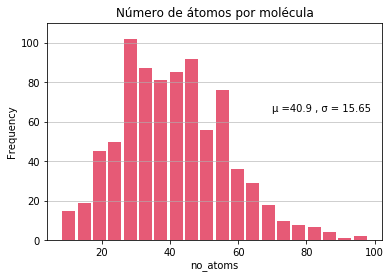

In [8]:
import matplotlib.pyplot as plt
import statistics as stats
import numpy as np

n, bins, patches = plt.hist(x=atoms, bins='auto', color='crimson', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('no_atoms')
plt.ylabel('Frequency')
plt.title('Número de átomos por molécula')

mu = stats.mean(atoms)
sigma = stats.pstdev(atoms)
mu = str(round(mu, 2))
sigma = str(round(sigma, 2))

plt.text(70, 65, '\u03BC ='+ mu +' , ' +'\u03C3 = ' + sigma)
maxfreq = n.max()

plt.savefig('Átomos_por_molecula.png', dpi=500)
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


In [6]:
new_cid = []
new_mp = []
new_smiles = []
new_atoms = []
for i in range(len(atoms)):
    number = atoms[i]
    if number <= 55 and number >= 22:
        new_cid.append(cids_available[i])
        new_mp.append(mp_available[i])
        new_smiles.append(smiles_available[i])
        new_atoms.append(atoms[i])

In [7]:
df = pd.DataFrame() 
df['cid'] = new_cid 
df['num_atoms'] = new_atoms
df['melting_point'] = new_mp 
df['smiles'] = new_smiles 


In [8]:
df

,cid,num_atoms,melting_point,smiles
0,1051,26,528.15,CC1=NC=C(C(=C1O)C=O)COP(=O)(O)O
1,6140,23,556.15,C1=CC=C(C=C1)C[C@@H](C(=O)O)N
2,171548,32,505.15,C1[C@H]2[C@@H]([C@@H](S1)CCCCC(=O)O)NC(=O)N2
3,5962,24,497.65,C(CCN)C[C@@H](C(=O)O)N
4,6322,26,517.15,C(C[C@@H](C(=O)O)N)CN=C(N)N
...,...,...,...,...
589,37367,44,173.50,CN1C2=C(C=C(C=C2)Cl)C(=NC(C1=O)OC(=O)N(C)C)C3=...
590,16630,22,410.15,C1C(OC(=N1)N)C2=CC=CC=C2
591,13765,53,173.50,CC[C@@]1(CC[C@@H]2[C@@]1(CC[C@H]3[C@H]2CCC4=CC...
592,20055236,47,462.15,C[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@@H]2O)CCC4=C(...


In [9]:
df.to_csv('DScribe_mp_cid_smiles.csv', index=False)

# ----Cargar desde aquí--------

In [1]:
from ase.data.pubchem import pubchem_atoms_search, pubchem_atoms_conformer_search
from ase.build import molecule
#from dscribe.descriptors import CoulombMatrix
from dscribe.descriptors import SOAP
#from dscribe.descriptors import ACSF
#from dscribe.descriptors import MBTR
import pandas as pd
import numpy as np

In [2]:
dt = pd.read_csv("DScribe_mp_cid_smiles.csv") 
cids = dt['cid']

In [3]:
# Setup
atomic_numbers = [1, 6, 7, 8, 35, 17, 53, 9, 15, 16]
species = ["H", "C", "N", "O", "Br", "Cl", "I", "F", "P", "S"]

#Common
rcut = 5.5
nmax = 8
lmax = 6
n_atoms_max = 55

#Particularities ACSF
g2_params=[[1, 1], [1, 2], [1, 3]],
g4_params=[[1, 1, 1], [1, 2, 1], [1, 1, -1], [1, 2, -1]],

#Particularities MBTR
k1={
        "geometry": {"function": "atomic_number"},
        "grid": {"min": 0, "max": 8, "n": 100, "sigma": 0.1},
    },
k2={
        "geometry": {"function": "inverse_distance"},
        "grid": {"min": 0, "max": 1, "n": 100, "sigma": 0.1},
        "weighting": {"function": "exponential", "scale": 0.5, "cutoff": 1e-3},
    },
k3={
        "geometry": {"function": "cosine"},
        "grid": {"min": -1, "max": 1, "n": 100, "sigma": 0.1},
        "weighting": {"function": "exponential", "scale": 0.5, "cutoff": 1e-3},
    },

# Setting up the Coulomb descriptor
cm = CoulombMatrix(n_atoms_max, flatten=False,
    permutation='sorted_l2')

# Setting up the SOAP descriptor
soap = SOAP(species=species, periodic=False, rcut=rcut, nmax=nmax, lmax=lmax, sigma=0.2, average=False)

# Setting up the ACSF descriptor
acsf = ACSF(species= species, rcut=rcut, g2_params=[[1, 1], [1, 2], [1, 3]],
    g4_params=[[1, 1, 1], [1, 2, 1], [1, 1, -1], [1, 2, -1]],)

# Setting up the MBTR descriptor
mbtr = MBTR(species= species, 
    k1={
        "geometry": {"function": "atomic_number"},
        "grid": {"min": 0, "max": 8, "n": 100, "sigma": 0.1},
    },
    k2={
        "geometry": {"function": "inverse_distance"},
        "grid": {"min": 0, "max": 1, "n": 100, "sigma": 0.1},
        "weighting": {"function": "exponential", "scale": 0.5, "cutoff": 1e-3},
    },
    k3={
        "geometry": {"function": "cosine"},
        "grid": {"min": -1, "max": 1, "n": 100, "sigma": 0.1},
        "weighting": {"function": "exponential", "scale": 0.5, "cutoff": 1e-3},
    },
    periodic=False,
    normalization="l2_each",)


In [4]:
coulomb_results = []
coulomb_errors = []
mbtr_results = []
mbtr_errors = []
soap_results = []
soap_errors = []
acsf_results = []
acsf_errors =[]

for i in range(len(cids)):
    try:
        unknown = pubchem_atoms_search(cid = cids[i])
        #Coulomb
       # coulomb_target = cm.create(unknown)
       # coulomb_results.append(coulomb_target)
        
        #mbtr
       # mbtr_target = mbtr.create(unknown)
       # mbtr_results.append(mbtr_target)
        
        #soap
        soap_target = soap.create(unknown)
        soap_results.append(soap_target)
        print(i)
        
        #ACSF
       # acsf_target = acsf.create(unknown)
       # acsf_results.append(acsf_target)
        
        print(i)
    except ValueError:  
        #coulomb_errors.append(i)
        #mbtr_errors.append(i)
        #soap_erros.append(i)
        #acsf.append(i)
        print('error in', i)
        continue

/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "1051" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


0
0


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6140" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


1
1


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "171548" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


2
2


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5962" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


3
3


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6322" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


4
4


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "1103" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


5
5


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6083" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


6
6


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5280934" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


7
7


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6057" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


8
8


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "67678" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


9
9


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "493570" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


10
10


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "1738118" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


11
11


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "124886" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


12
12


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6106" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


13
13


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6305" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


14
14


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "1130" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


15
15


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "9750" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


16
16


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "445354" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


17
17


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "1054" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


18
18


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6112" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


19
19


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6306" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


20
20


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5957" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


21
21


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3404" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


22
22


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "71398" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


23
23


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2284" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


24
24


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3007" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


25
25


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "89594" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


26
26


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3958" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


27
27


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "34359" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


28
28


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4771" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


29
29


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "52195" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


30
30


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "33741" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


31
31


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2369" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


32
32


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3365" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


33
33
34
34
35
35


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4195" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


36
36


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4679" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


37
37


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "41781" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


38
38


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2771" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


39
39


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2368" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


40
40


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "152946" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


41
41


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "38521" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


42
42


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5486971" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


43
43


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5391" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


44
44


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4121" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


45
45


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2479" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


46
46


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4463" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


47
47


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2481" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


48
48


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "20279" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


49
49


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "1201549" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


50
50


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6540428" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


51
51


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5905" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


52
52
53
53


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "1775" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


54
54


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3054" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


55
55


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2812" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


56
56
57
57


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5344" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


58
58


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4171" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


59
59


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "54676038" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


60
60


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5095" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


61
61


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "11289" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


62
62


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3784" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


63
63


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2140" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


64
64


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5284627" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


65
65


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2179" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


66
66


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5920" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


67
67


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3114" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


68
68


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3676" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


69
69


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "26987" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


70
70


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "54841" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


71
71


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2708" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


72
72


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "667484" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


73
73


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "135400182" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


74
74
75
75
76
76


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2474" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


77
77


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "135398748" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


78
78
79
79


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "8275" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


80
80


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2732" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


81
81


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3295" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


82
82


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4737" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


83
83
84
84


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2160" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


85
85


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5790" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


86
86


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3715" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


87
87


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "14052" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


88
88


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4095" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


89
89


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "135398745" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


90
90


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2249" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


91
91


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4594" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


92
92


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2678" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


93
93


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "39186" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


94
94


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2148" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


95
95


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2789" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


96
96


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4201" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


97
97


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "8226" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


98
98


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2145" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


99
99


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5215" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


100
100


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "135398737" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


101
101
102
102


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "439260" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


103
103


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "60613" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


104
104


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4205" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


105
105


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4064" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


106
106


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "33624" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


107
107


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5572" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


108
108


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "9051" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


109
109


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4178" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


110
110


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "71384" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


111
111


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2162" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


112
112
113
113
114
114


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4919" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


115
115


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6041" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


116
116


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "31072" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


117
117


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5355" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


118
118


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3290" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


119
119


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2576" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


120
120


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5994" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


121
121


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "26934" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


122
122


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "441140" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


123
123


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "969472" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


124
124
125
125


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "16960" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


126
126


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3964" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


127
127


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "77999" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


128
128


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "119570" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


129
129


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "1989" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


130
130


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6249" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


131
131


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5193" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


132
132


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "51634" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


133
133


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4107" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


134
134


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "154417" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


135
135


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5732" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


136
136


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3324" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


137
137


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5282443" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


138
138


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "29327" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


139
139


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6256" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


140
140


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4917" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


141
141


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2913" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


142
142


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2315" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


143
143


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5578" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


144
144


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "60750" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


145
145


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5959" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


146
146


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3883" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


147
147


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3105" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


148
148


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3168" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


149
149


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5819" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


150
150


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4058" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


151
151


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3957" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


152
152


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6024" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


153
153


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4893" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


154
154


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3696" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


155
155


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5284513" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


156
156


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4409" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


157
157


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4099" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


158
158


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3229" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


159
159


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3034034" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


160
160


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "54677971" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


161
161


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "16078" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


162
162


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3386" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


163
163


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "10770" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


164
164


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2712" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


165
165


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2726" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


166
166


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2662" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


167
167


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2435" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


168
168


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "51081" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


169
169


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2123" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


170
170


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5253" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


171
171


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "441314" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


172
172


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "35370" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


173
173
174
174
175
175


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3397" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


176
176


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5509" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


177
177


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2756" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


178
178


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3559" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


179
179


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5359371" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


180
180


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "41684" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


181
181


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "8730" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


182
182


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "564" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


183
183


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5360696" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


184
184


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2082" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


185
185


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6957673" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


186
186


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "449171" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


187
187


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4170" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


188
188


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5510" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


189
189


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2907" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


190
190


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4060" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


191
191


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6915944" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


192
192


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2764" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


193
193


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4543" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


194
194


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2170" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


195
195


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4991" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


196
196


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2266" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


197
197


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "439693" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


198
198
199
199


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "54676228" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


200
200


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3658" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


201
201


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2343" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


202
202


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "126941" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


203
203


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2554" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


204
204


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "27447" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


205
205


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4946" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


206
206


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "174174" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


207
207


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3342" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


208
208


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2803" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


209
209


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5328" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


210
210


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "135398742" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


211
211


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4020" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


212
212


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "11333" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


213
213


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "71616" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


214
214


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "10917" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


215
215


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5388962" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


216
216


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3033637" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


217
217


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3033" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


218
218


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "16231" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


219
219


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3869" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


220
220


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "7638" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


221
221


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "1548887" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


222
222


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2910" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


223
223


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5906" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


224
224


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6916249" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


225
225


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2405" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


226
226


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2165" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


227
227


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3435" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


228
228


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "54680690" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


229
229


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "31307" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


230
230
231
231
232
232
233
233


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3517" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


234
234


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2088" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


235
235


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5320" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


236
236


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5865" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


237
237


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2796" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


238
238


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "60961" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


239
239


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4030" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


240
240


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3180" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


241
241


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "10100" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


242
242


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4211" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


243
243


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "18283" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


244
244


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3182" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


245
245


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "441278" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


246
246
247
247


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5533" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


248
248


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4032" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


249
249


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "15459" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


250
250


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "9047" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


251
251


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5816" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


252
252


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5358" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


253
253


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5362065" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


254
254


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2727" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


255
255


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2345" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


256
256


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3961" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


257
257


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5452" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


258
258


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "34633" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


259
259


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "54678486" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


260
260


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4192" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


261
261


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "19150" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


262
262


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3393" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


263
263


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5775" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


264
264
265
265


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3440" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


266
266


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5487" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


267
267


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6604200" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


268
268


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4100" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


269
269


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5360515" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


270
270


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "60825" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


271
271


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3052" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


272
272


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3394" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


273
273


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6196" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


274
274


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "43815" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


275
275


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "50294" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


276
276


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6230" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


277
277


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "19861" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


278
278


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4914" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


279
279


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "57469" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


280
280


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5584" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


281
281


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "9568614" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


282
282


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4034" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


283
283


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4735" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


284
284


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "443387" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


285
285


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6251" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


286
286


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "60490" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


287
287


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4236" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


288
288


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3000322" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


289
289


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3308" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


290
290


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4906" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


291
291


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3241" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


292
292


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3292" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


293
293


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5538" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


294
294


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3598" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


295
295


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3033818" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


296
296


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "60606" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


297
297


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "441350" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


298
298


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5280980" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


299
299


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2784" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


300
300


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4004" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


301
301


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3647" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


302
302


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4421" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


303
303


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3675" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


304
304
305
305


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4044" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


306
306


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "135398513" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


307
307


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "156391" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


308
308


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6194" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


309
309


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4909" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


310
310


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5339" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


311
311


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5504" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


312
312


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "31640" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


313
313


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4199" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


314
314


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4740" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


315
315


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4935" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


316
316


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3702" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


317
317


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5593" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


318
318


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2381" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


319
319


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "37542" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


320
320


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4781" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


321
321


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3345" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


322
322


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "54677470" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


323
323


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4086" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


324
324


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "287180" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


325
325


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4943" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


326
326


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "110635" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


327
327


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2581" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


328
328


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3117" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


329
329


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "1676" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


330
330


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "16666" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


331
331


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2762" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


332
332


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3016" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


333
333


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4762" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


334
334


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6839" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


335
335


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "51039" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


336
336


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "44115" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


337
337


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5503" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


338
338


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "36811" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


339
339


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4616" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


340
340


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5311304" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


341
341


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2794" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


342
342


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "26879" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


343
343


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "8271" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


344
344


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4748" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


345
345


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "135398738" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


346
346


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "7028" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


347
347
348
348


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "1549008" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


349
349
350
350


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5755" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


351
351


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3059" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


352
352


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3001055" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


353
353


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5311017" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


354
354


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2119" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


355
355


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "33572" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


356
356


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5284549" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


357
357


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5359" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


358
358


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5403" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


359
359


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3516" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


360
360


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "60877" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


361
361


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2720" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


362
362


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6883" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


363
363


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5245" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


364
364


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2471" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


365
365


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5284566" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


366
366


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "667476" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


367
367


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5336" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


368
368


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4633" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


369
369
370
370


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5556" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


371
371


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "135398739" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


372
372


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "14677" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


373
373


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3278" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


374
374


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "446220" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


375
375


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "441074" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


376
376


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5734" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


377
377


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5479" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


378
378


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "8944" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


379
379


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "8249" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


380
380
381
381


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3827" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


382
382


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2895" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


383
383


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4768" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


384
384


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3325" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


385
385


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "9444" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


386
386


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4011" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


387
387


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4636" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


388
388


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "7029" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


389
389


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4037" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


390
390


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2911" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


391
391


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "24066" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


392
392


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "54680692" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


393
393


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3331" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


394
394


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4440" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


395
395


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5078" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


396
396
397
397


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4828" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


398
398


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4062" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


399
399


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5719" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


400
400


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "38853" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


401
401


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2267" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


402
402


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "150311" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


403
403


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6049" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


404
404
405
405


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3948" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


406
406


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2905" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


407
407


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5983" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


408
408


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5282379" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


409
409


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "9933193" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


410
410


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6253" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


411
411


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "681" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


412
412
413
413


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4614" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


414
414


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2265" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


415
415


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3639" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


416
416


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "19003" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


417
417


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2083" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


418
418


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2882" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


419
419


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "135398740" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


420
420


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3902" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


421
421


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2478" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


422
422


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3825" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


423
423


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3202" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


424
424


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4174" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


425
425


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5329" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


426
426


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3519" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


427
427


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2370" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


428
428


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "27661" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


429
429


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5560" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


430
430


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3333" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


431
431


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "446541" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


432
432


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "60700" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


433
433


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3284" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


434
434


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4911" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


435
435


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "28517" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


436
436


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4913" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


437
437


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "26757" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


438
438


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3339" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


439
439


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5426" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


440
440


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "460612" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


441
441
442
442


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5379" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


443
443


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "441300" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


444
444


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3672" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


445
445


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5904" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


446
446


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4507" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


447
447


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "440473" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


448
448


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "38945" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


449
449


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "10548" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


450
450


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4891" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


451
451


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4539" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


452
452


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "33613" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


453
453


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3779" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


454
454


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "896" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


455
455


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "9870843" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


456
456


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2802" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


457
457


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4927" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


458
458


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4066" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


459
459


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "657237" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


460
460


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3100" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


461
461


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "135409453" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


462
462


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5910" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


463
463


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2337" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


464
464


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5850" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


465
465


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "72281" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


466
466


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4612" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


467
467


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3899" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


468
468


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "60953" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


469
469


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "68617" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


470
470


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5210" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


471
471
472
472


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4189" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


473
473


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5479529" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


474
474


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4680" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


475
475


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4485" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


476
476


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3475" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


477
477


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4753" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


478
478
479
479


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5505" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


480
480


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2197" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


481
481


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3198" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


482
482


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2375" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


483
483


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4923" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


484
484


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4829" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


485
485


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5342" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


486
486


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "47965" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


487
487


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "667468" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


488
488


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3038" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


489
489


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3103" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


490
490


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3354" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


491
491


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5281006" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


492
492


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2995" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


493
493


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3032285" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


494
494


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "444" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


495
495


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5583" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


496
496


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2431" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


497
497


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "8612" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


498
498


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5401" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


499
499


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "36273" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


500
500


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4583" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


501
501


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2754" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


502
502


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4915" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


503
503


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3518" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


504
504


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4235" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


505
505


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4763" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


506
506


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "146570" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


507
507


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6726" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


508
508


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2717" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


509
509


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "10607" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


510
510


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3690" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


511
511


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5284596" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


512
512


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3151" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


513
513
514
514


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "47811" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


515
515


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2749" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


516
516
517
517


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "1978" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


518
518


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "68844" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


519
519


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3356" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


520
520


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "44093" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


521
521


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5735" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


522
522


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5284583" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


523
523


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "39147" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


524
524


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3373" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


525
525


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3950" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


526
526


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "39468" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


527
527


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "31477" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


528
528


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3261" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


529
529


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6914273" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


530
530


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3821" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


531
531


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5002" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


532
532


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3055" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


533
533


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4168" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


534
534


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6047" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


535
535


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "667466" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


536
536


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3463" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


537
537


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2801" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


538
538


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5574" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


539
539


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3759" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


540
540


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "443884" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


541
541


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3343" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


542
542


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2372" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


543
543


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "439213" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


544
544


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4883" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


545
545


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5322" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


546
546


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "17134" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


547
547


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4870" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


548
548


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6307" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


549
549


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "456255" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


550
550


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "441199" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


551
551


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6533629" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


552
552


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "38103" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


553
553


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2164" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


554
554


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6464" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


555
555


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6473" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


556
556


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "10518" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


557
557


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3608" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


558
558
559
559


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "9294" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


560
560


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "9565" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


561
561


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "8969" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


562
562


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "39042" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


563
563


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2833" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


564
564


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5161" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


565
565
566
566


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2783" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


567
567


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "91562" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


568
568


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "54676537" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


569
569


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6009" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


570
570


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "135413504" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


571
571
572
572


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3698" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


573
573


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4632" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


574
574


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2218" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


575
575


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "235905" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


576
576


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2206" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


577
577


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "3487" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


578
578


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "4756" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


579
579


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "151182" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


580
580


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "10257" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


581
581


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "9287" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


582
582


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5462328" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


583
583


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "5359271" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


584
584
585
585


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "2294" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


586
586


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "441457" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


587
587


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "6089" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


588
588


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "37367" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


589
589


/home/neft/anaconda3/envs/ai/lib/python3.7/site-packages/ase/data/pubchem.py:85: UserWarning: The structure "16630" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  ' function'.format(search))


590
590
591
591
592
592
593
593


In [5]:
print(len(soap_results), soap_results[0].shape)
#print(len(acsf_results), acsf_results[0].shape)
#print(len(coulomb_results), coulomb_results[0].shape)

594 (26, 13860)


In [6]:
#Función para obtener los indices que definiran las dimensiones de las matrices
def index_matrix(descriptor):
    one = []
    two = []
    for i in range(len(descriptor)):
        #print(i)
        x = descriptor[i].shape #los índices son las dimensiónes mas grandes encontradas en cada descriptor
        one.append(x[0])
        two.append(x[1])
    index_1 = max(one)
    index_2 = max(two)
    return index_1, index_2

In [7]:
#Padding

def padding(descriptor):
    #Creación de las matrices
    molecule_matrix = []
    for line in range(len(cids)):
        molecule = np.zeros(index_matrix(descriptor))
        molecule_matrix.append(molecule)

    #Llenado de las matrices    
    for i, molecule in enumerate(descriptor):
        for t, atom in enumerate(molecule):
            for j, element in enumerate(atom):
                molecule_matrix[i][t][j] = descriptor[i][t][j]
    return molecule_matrix

In [8]:
#coulomb_matrix = padding(coulomb_results)
#mbtr_matrix = padding(mbtr_results)
soap_matrix = padding(soap_results)
#acsf_matrix = padding(acsf_results)

In [1]:
#np.savez_compressed('coulomb_matrix', a = coulomb_matrix)
#np.savez_compressed('mbtr_matrix', b = mbtr_matrix)
np.savez_compressed('saop_matrix', c = soap_matrix)
#np.savez_compressed('acsf_matrix', d = acsf_matrix)

NameError: name 'np' is not defined